In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
train_dir = r'C:\Users\Lenovo\Downloads\archive (8)\train'
test_dir = r'C:\Users\Lenovo\Downloads\archive (8)\test'
img_height, img_width = 48, 48
batch_size = 32


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

epochs = 50

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 423s 462ms/step - accuracy: 0.2338 - loss: 1.8407 - val_accuracy: 0.2519 - val_loss: 1.7871 - learning_rate: 0.0010
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 439s 487ms/step - accuracy: 0.2577 - loss: 1.7989 - val_accuracy: 0.2490 - val_loss: 1.7571 - learning_rate: 0.0010
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 428s 475ms/step - accuracy: 0.2547 - loss: 1.7826 - val_accuracy: 0.2814 - val_loss: 1.7321 - learning_rate: 0.0010
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 459s 509ms/step - accuracy: 0.2673 - loss: 1.7659 - val_accuracy: 0.2976 - val_loss: 1.7044 - learning_rate: 0.0010
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 434s 481ms/step - accuracy: 0.2731 - loss: 1.7595 - val_accuracy: 0.3018 - val_loss: 1.7048 - learning_rate: 0.0010
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 431s 478ms/step - accuracy: 0.2766 - loss: 1.7484 - val_accuracy: 0.3047 - val_loss: 1.6690 - learning_rate: 0.0010
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 424s 471ms/step - accura

Epoch 44/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 128s 142ms/step - accuracy: 0.4334 - loss: 1.4704 - val_accuracy: 0.5265 - val_loss: 1.2435 - learning_rate: 2.0000e-04
Epoch 45/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 114s 127ms/step - accuracy: 0.4338 - loss: 1.4710 - val_accuracy: 0.5312 - val_loss: 1.2347 - learning_rate: 2.0000e-04
Epoch 46/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 134s 149ms/step - accuracy: 0.4385 - loss: 1.4572 - val_accuracy: 0.5350 - val_loss: 1.2258 - learning_rate: 1.0000e-04
Epoch 47/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 211s 234ms/step - accuracy: 0.4326 - loss: 1.4624 - val_accuracy: 0.5323 - val_loss: 1.2322 - learning_rate: 1.0000e-04
Epoch 48/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 203s 225ms/step - accuracy: 0.4400 - loss: 1.4533 - val_accuracy: 0.5329 - val_loss: 1.2290 - learning_rate: 1.0000e-04
Epoch 49/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 216s 239ms/step - accuracy: 0.4347 - loss: 1.4537 - val_accuracy: 0.5352 - val_loss: 1.2266 - learning_rate: 1.0000e-04
Epoch 50/50
898/898 ━━━━━━━━━━━━━━

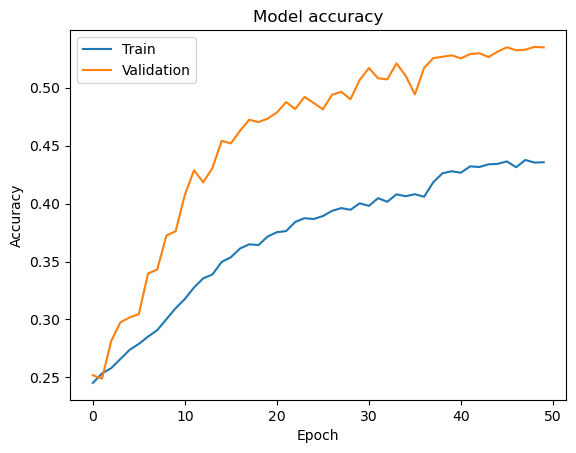

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



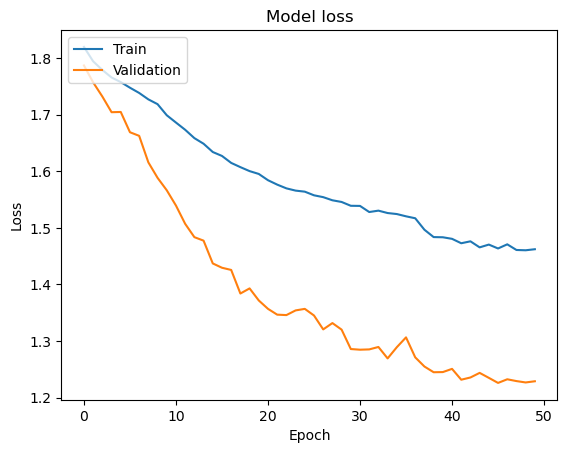

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
model.save('emotion_detector_model.h5')


In [16]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

model = load_model('emotion_detector_model.h5')

def predict_emotion(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (48, 48))
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    prediction = model.predict(img)
    emotion = {v: k for k, v in train_generator.class_indices.items()}
    return emotion[np.argmax(prediction)]


In [21]:
img_path = r'C:\Users\Lenovo\Downloads\sad-face-pictures-qm02f8bfvzhxyf1y.jpg'
plt.show(img_path)
predicted_emotion = predict_emotion(img_path)
print(f'Predicted Emotion: {predicted_emotion}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
Predicted Emotion: sad
